In [4]:
!pip install matplotlib

In [6]:
!pip install opencv-python

In [16]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
aiohttp                   3.9.5
aiosignal                 1.3.1
altair                    5.3.0
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
dataclasses-json          0.6.6
debugpy                   1.8.1
decorator          

In [7]:
import tensorflow as tf
import os

In [119]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [39]:
import cv2
!pip install pillow

In [37]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)
    

05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Supremely-Happy-People-1.jpg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
4239f3d51d092f69d529f372a37b4601.jpg
56f455011e0000b300705475.jpeg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
9-not-need-happy.jpg
960x0.jpg
AF2bZyixqH7yoVM-_2-dFlH5hQ2gV_u70uNvz0tt3WDKuUJivAs64-c-mo.jpg
A_Sep20_14_1189155141.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
compassion.jpg
Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg
depositphotos_391577690

In [65]:
import os
from PIL import Image

def get_image_type(image_path):
    try:
        with Image.open(image_path) as img:
            img_format = img.format.lower()  # Convert to lowercase for comparison
            return img_format
    except IOError:
        print(f"Unable to open the image file: {image_path}")
        return None

data_dir = 'Data'
image_ext = {'jpeg', 'png', 'bmp', 'jpg'}  # Add any other formats you want to keep

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip any non-directory files
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        img_type = get_image_type(image_path)  # Use img_type to avoid shadowing type built-in
        if img_type not in image_ext:
            print(f'Image not in allowed list: {image_path}')
            os.remove(image_path)


Image not in allowed list: Data\Happy People\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in allowed list: Data\Happy People\traitshappypeople.jpg
Unable to open the image file: Data\Happy People\vector.svg
Image not in allowed list: Data\Happy People\vector.svg
Unable to open the image file: Data\Happy People\vector10.svg
Image not in allowed list: Data\Happy People\vector10.svg
Unable to open the image file: Data\Happy People\vector11.svg
Image not in allowed list: Data\Happy People\vector11.svg
Unable to open the image file: Data\Happy People\vector2.svg
Image not in allowed list: Data\Happy People\vector2.svg
Unable to open the image file: Data\Happy People\vector3.svg
Image not in allowed list: Data\Happy People\vector3.svg
Unable to open the image file: Data\Happy People\vector4.svg
Image not in allowed list: Data\Happy People\vector4.svg
Unable to open the image file: Data\Happy People\vector5.svg
Image not in allowed list: Data\Hap

In [66]:
import numpy as np
import matplotlib.pyplot as plt

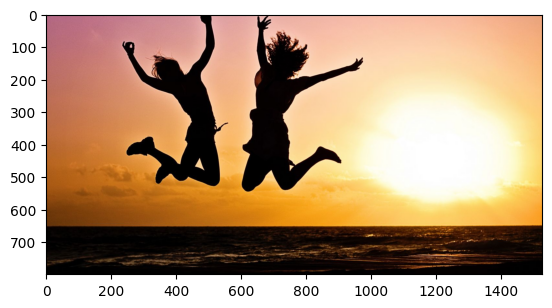

In [67]:
image=cv2.imread(os.path.join('Data', 'Happy People','_happy_jumping_on_beach-40815.jpg'))
image.shape
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [70]:
data=tf.keras.utils.image_dataset_from_directory('Data')

Found 254 files belonging to 2 classes.


In [71]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
data_iterator=data.as_numpy_iterator()

In [89]:
batch=data_iterator.next()
#1 is for sad people
#0 is for happy people
batch[1]


array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

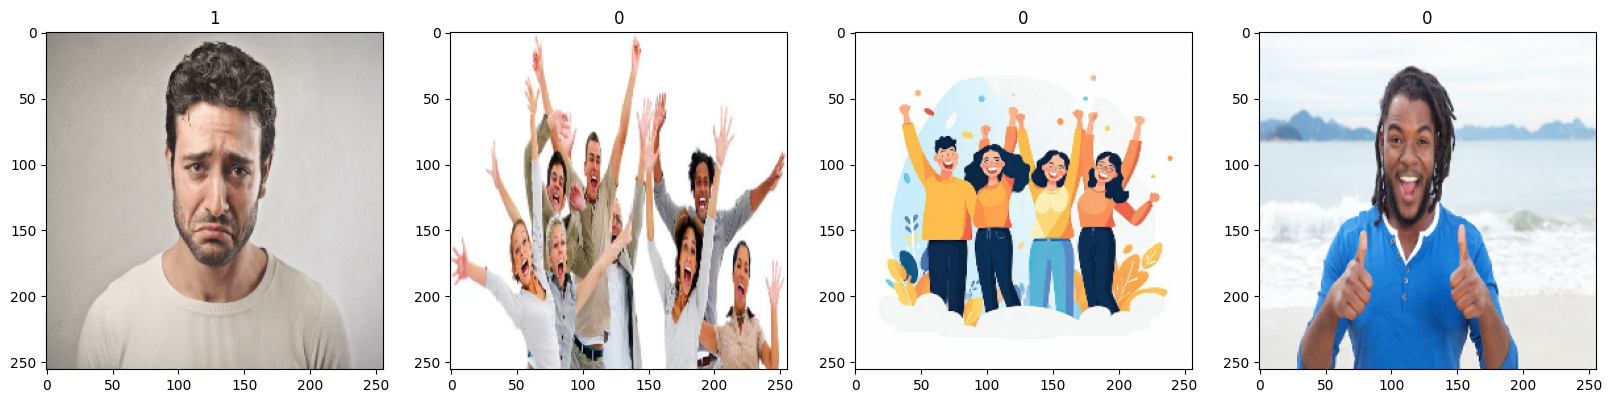

In [205]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [77]:
#scaling the data
data=data.map(lambda x,y :(x/255,y) )

In [79]:
scaled_iterator=data.as_numpy_iterator()

In [80]:
batch=scaled_iterator.next()

In [ ]:
batch[0].min()

Partition data

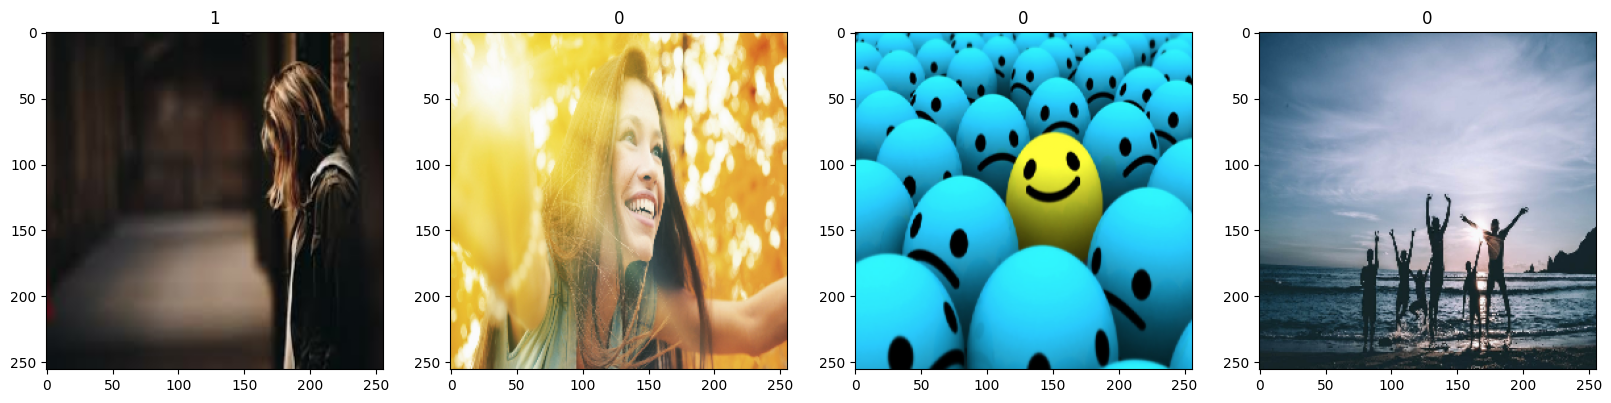

In [86]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [139]:
model=Sequential()

In [140]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [141]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 125, 125, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,391,473 (28.20 MB)

 Trainable params: 7,391,473 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='BinaryCrossentropy')

In [150]:
len(data)

8

In [151]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*.1)+1

In [152]:
test_size+val_size+train_size

8

In [153]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [154]:
logdir='logs'
tensorflow_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [155]:
hist=model.fit(train, epochs=10, validation_data=val,callbacks=[tensorflow_callback])

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5240 - loss: 0.8117 - val_accuracy: 0.4375 - val_loss: 0.6654
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 789ms/step - accuracy: 0.5251 - loss: 0.6320 - val_accuracy: 0.7812 - val_loss: 0.5977
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 745ms/step - accuracy: 0.7153 - loss: 0.6013 - val_accuracy: 0.8750 - val_loss: 0.5075
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 742ms/step - accuracy: 0.8043 - loss: 0.4704 - val_accuracy: 0.8281 - val_loss: 0.4151
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 751ms/step - accuracy: 0.8815 - loss: 0.3971 - val_accuracy: 0.8438 - val_loss: 0.3893
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8794 - loss: 0.3349 - val_accuracy: 0.8906 - val_loss: 0.2867
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 754ms/step - accuracy: 0.9268 - loss: 0.2516 - val_accuracy: 0.9375 - val_loss: 0.2135
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - accuracy: 0.8879 - loss: 0.2751 - val_accuracy: 0.9531 - val_loss: 0.20

Text(0.5, 1.0, 'Accuracy')

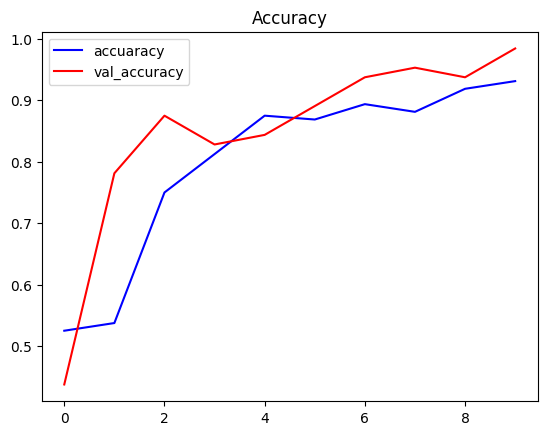

In [167]:
plt.plot(hist.history['accuracy'], color='blue', label='accuaracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend()
plt.title('Accuracy')

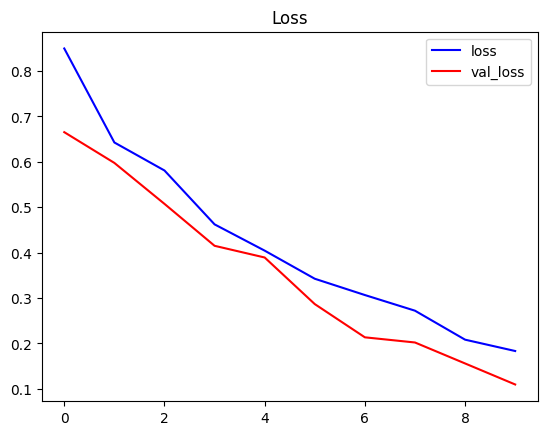

In [168]:
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

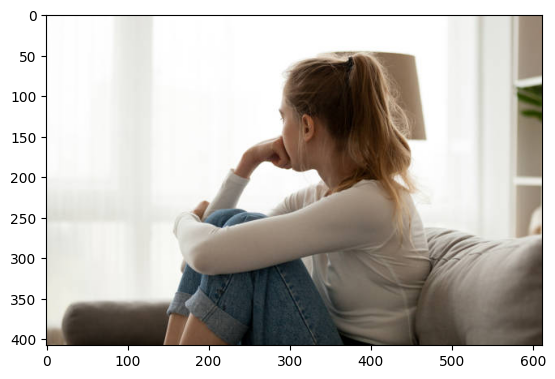

In [236]:
import cv2
img=cv2.imread('sad lady.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

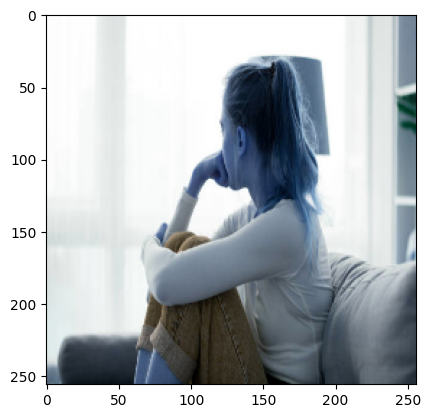

In [237]:
img_resize=tf.image.resize(img,(256,256))
plt.imshow(img_resize.numpy().astype(int))


In [238]:
y_pred = model.predict(np.expand_dims(img_resize/255, 0))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.94961435]], dtype=float32)

In [239]:
def final_ans(y_pred):
    if y_pred > 0.5:
        return 'Sad'
    else:
        return 'Happy'

In [240]:
ans=final_ans(y_pred)
ans

'Sad'